### Podatkovno rudarjenje, koda za vmesno poročilo o opravljenem delu, 01. 04. 2019

# Priprava podatkov in osnovna vizualizacija

**Nejc Prijatelj**

**Žan Pristopec**

**Matevž Kušar**

V tem notebook-u bomo pisali kodo za obdelavo podatkov, iz katerih bomo s pomočjo pythona, statistike in vizualizacije poiskusili odgovoriti na čim več vprašanj, ki smo si jih zastavili pri izbiri projekta.

## Podatki

Kratek opis podatkov je bil podan že pri osnutku projekta, tu pa bi si najprej na hitro pogledali kaj točno dani podatki vsebujejo. Link do podatkov(https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

Vse podatke ki smo jih dobili s spletne strani Kaggle hranimo v datoteki "master.csv".

Vsak podatek v tej zbirki ima naslednje atribute:
* *country:* država v kateri so bili zabeleženi samomori.
* *year:* leto na katerega se nanašajo podatki.
* *sex:* spol starostne skupine za to leto.
* *age_group:* starostna skupina.
* *count_of_suicides:* število samomorov za to leto.
* *population:* število oseb določenega spola v tem letu, za to starostno skupino.
* *suicide_rate:* pogostost samomorov - število samomorov na 100 tisoč ljudi.
* *country-year_composite_key:* država-leto ključ.
* *HDI_for_year:* indeks človekovega razvoja (izračunano iz življenjske dobe, stopnje izobrazbe in življenjske ravni).
* *GDP_for_year:* bruto domači proizvod države za tisto leto.
* *GDP_per_capita:* bruto domači proizvod na prebivalca države za tisto leto.
* *generation:* generacija (temelji na povprečju starostne skupine).

S pomočjo zgoraj naštetih atributov bomo v vmesnem poročilu podatke prebrali, ter jih vizualno predstavili.


### Pridobivanje podatkov

S preprosto funkcijo smo prebrali podatke iz datoteke "master.csv", v pandas dataframe, s pomočjo katerega smo jih obdelali in prestavili vizualno. Ugotovili smo, da je za leto 2016 zelo malo podatkov, zato se nanje ne moremo zanesti, saj prikazujejo zelo visok skok v ravni samomorv. Prav tako je DHI zelo velikokrat enak null, zato smo te dva podatka odstranili.

In [1]:
import pandas as pd
import seaborn as sns

main = pd.read_csv('master.csv', sep=',', encoding='cp1250', header=1, names = ['country', 'year', 'sex', 'age', 'suicide_no', 'population', 'suicide_per_100k', 'country_year', 'HDI', 'GDP', 'GDP_per_capita', 'generation'])
main = main.drop('HDI', 1)
main = main[main.year != 2016]

### Nekaj vizualnih predstavitev

Ker je tako velika količina podatkov prevelika da bi iz nje lahko kar tako ugotovili določene zanimive lastnosti, smo se odločili da bomo najprej naredili nekaj grafov da dobimo občutek s čem imamo opravka, in da predstavimo nekatere bolj zanimive podatke.

Pri spodnji kodi smo uporabili stopnjo samomorov, saj le ta ni odvisna od populacije države.

In [2]:
df = main[['country','suicide_per_100k']]
df1 = df.groupby(['country'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
df2 = df1.reset_index(drop=True)[:10]
df2

,country,suicide_per_100k
0,Lithuania,40.583968
1,Sri Lanka,35.295152
2,Russia,34.892377
3,Hungary,33.049100
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321


Spodaj je število vseh samomorov v podatkovni zbirki, razdeljenih po spolu.

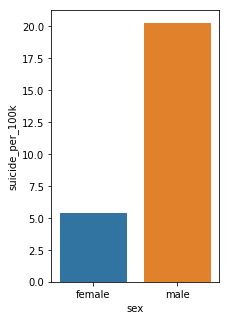

In [3]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

df=main[['sex','suicide_per_100k']].groupby('sex',as_index=False).mean()
fig=plt.figure(figsize=(3,5));
sns.barplot(x='sex', y='suicide_per_100k', data = df);
#plt.savefig('images/sex_difference.png')

Povprečno število samomorov in povprečni BDP na prebivalca za vse države (razvrščeno po številu samomorov).

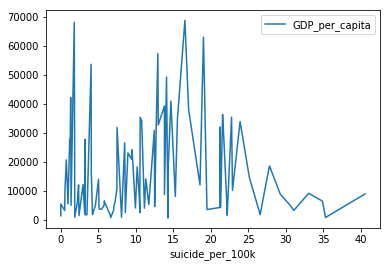

In [4]:
df2 = main[["country", "suicide_per_100k"]]
df2 = df2.groupby(['country'], as_index=False).mean()
df3 = main[["country", "GDP_per_capita"]]
df3 = df3.groupby(['country'], as_index=False).mean()
df2['GDP_per_capita'] = df3['GDP_per_capita']
df2 = df2[['suicide_per_100k', 'GDP_per_capita']]
df2 = df2.sort_values(by=['suicide_per_100k'], ascending=False).reset_index(drop=True)
df2

ax = plt.gca()

df2.plot(kind='line',x='suicide_per_100k',y='GDP_per_capita',ax=ax)
#plt.savefig('images/GDP_and_suicide_rate.png')
plt.show()


Tu je razvidno, da BDP nima vpliva na stopnjo samomora.

Naslednje, število samomorov glede na starostno skupino.

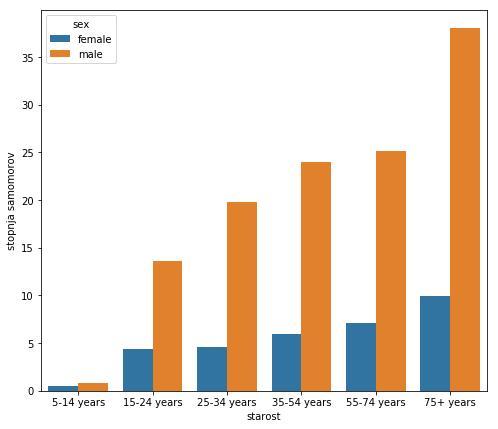

In [5]:
#df = main[['age','suicide_per_100k']]
#df1 = df.groupby(['age'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
#df2 = df1.reset_index(drop=True)
#graf = df2.plot(kind='bar', x='age', legend=False, figsize=(10,5))
#graf.legend();
#graf.set_title("Število samomorov na 100k ljudi v posamezni starostni skupini", fontsize=14)
#graf.set_xlabel("\nStarostna skupina", fontsize=12)
#graf.set_ylabel("\nŠtevilo samomorov na 100 000 ljudi", fontsize=12);

df = main[['age','suicide_per_100k','sex']].groupby(['age','sex'],as_index=False).mean().sort_values(by = 'suicide_per_100k')
fig = plt.figure(figsize=(8,7));
ax = sns.barplot(x='age', y='suicide_per_100k',hue='sex', data = df);
ax.set(xlabel='starost', ylabel='stopnja samomorov')

plt.show()
#graf.set_title("Število samomorov na 100k ljudi v posamezni starostni skupini", fontsize=14)
#graf.set_xlabel("\nStarostna skupina", fontsize=12)
#graf.set_ylabel("\nŠtevilo samomorov na 100 000 ljudi", fontsize=12);
#plt.savefig('images/starostne_skupine.png')

Vidimo da je verjetnost samomora pri moških višja pri vseh starostnih skupinah in pa tudi, da z leti narašča verjetnost samomora.

Število samomorov v posameznih letih na logaritmičnem grafu.

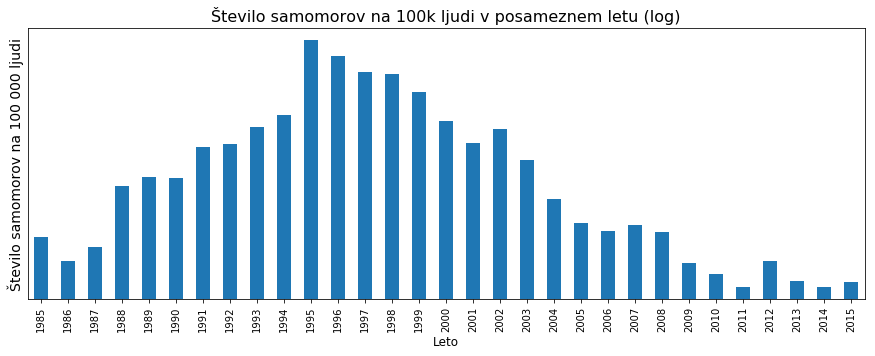

In [6]:
df = main[['year','suicide_per_100k']]
df1 = df.groupby(['year'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
df2 = df1.reset_index(drop=True)
graf = df2.sort_values(by=['year']).plot(kind='bar', x='year', legend=False, logy=True, figsize=(15,5))
graf.set_title("Število samomorov na 100k ljudi v posameznem letu (log)", fontsize=16)
graf.set_xlabel("Leto", fontsize=12)
graf.set_ylabel("Število samomorov na 100 000 ljudi", fontsize=14);
#plt.savefig('images/po_letih.png')

Tu je nekaj zanimivih stvari. Hitro naraščanje samomorov do leta 1995, še posebaj leta 1988 in 1995, potem pa hiter in enakomeren padec. Kasneje smo ugotvili, da je največja stopnja samomorov pri generaciji GI, ki pa so ravno v teh letih dosegli starost 75+, katera pa je tudi najbolj samomorilsko nagnjena. Ker je pri letu 2016 velik skok, smo to leto preverili in ugotovili, da manjka veliko podatkov, zato se nanje ne moremo zanesti in smo to leto odstranili.

### Nadaljevanje dela
Dodana datoteka z gini indexom, ki predstavlja razlike med prebivalstvom za vsako državo. Preneseno z https://www.wider.unu.edu/project/wiid-world-income-inequality-database, uporabljeno pa bo za preverjanje trditve, da je stopnja samomorov višja v državah, kjer so razlike med ljudmi večje. 

zgoraj napisano vključujemo zaradi profesrojevega komentarja, druga zadeva ki jo je tudi omenil pa je profil ljudi ki naredijo samomor. Kje in kako te podatke dobit ne vem, vemo samo spol, starost, GDP, generacija - pa še to samo za vse skupaj ki so v tej skupini ljudi.

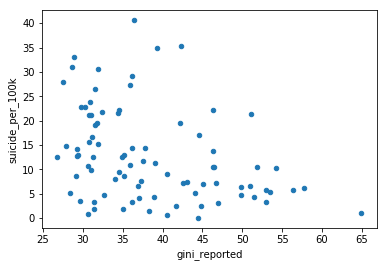

In [7]:
import pandas as pd

inequality = pd.read_excel('inequality_data.xlsx', sep=',', encoding='cp1250', usecols = [1, 4, 5, 49])
inequality_all = pd.read_excel('inequality_data.xlsx', sep=',', encoding='cp1250', usecols = [1, 4, 5, 50])
inequality = inequality[inequality.year >= 1985]

#povprecen gini index za vse drzave
inequality_main = inequality[['country', 'gini_reported']].groupby('country').mean()

df = main[['country','suicide_per_100k']].groupby('country').mean()
result = pd.concat([inequality_main, df], axis = 1, sort=True)
result = result.dropna().sort_values(by=['gini_reported'])
result.plot.scatter(x='gini_reported', y='suicide_per_100k')
#glede na graf bi rekel da razlike v standardu ne vplivajo na samomore, kvecjemu je pri manjših razlikah samomorov več
inequality_slovenia = inequality_all.loc[inequality_all['country'] == 'Slovenia']
inequality_slovenia = inequality_slovenia.groupby('year').mean().reset_index()

0.002004757840741802

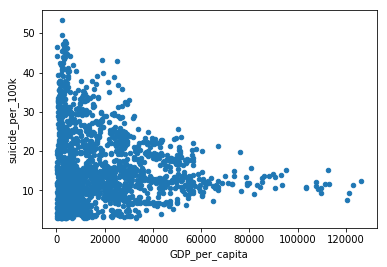

In [8]:

df_age = main.groupby('age').mean().sort_values(by=['suicide_per_100k'], ascending=False)
df_generation = main.groupby('generation').mean().sort_values(by=['suicide_per_100k'], ascending=False)
df_sex = main.groupby('sex').mean().sort_values(by=['suicide_per_100k'], ascending=False)
df_gdp = main.groupby('GDP_per_capita', as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False).dropna()
df_gdp_graf = df_gdp[['GDP_per_capita','suicide_per_100k']]
df_gdp_graf = df_gdp_graf[df_gdp_graf.suicide_per_100k > 3]
df_gdp_graf.plot.scatter(x='GDP_per_capita', y='suicide_per_100k')

main['suicide_per_100k'].corr(main['GDP_per_capita']) #nam vrne korelacijo 0.00200475, kar pomeni da med GPDjem in verjetnostjo samomora ni korelacije.

#prej je bilo ugotovljeno da je GDP ne vpliva na samomore, spodaj pa vidimo, da je stopnja samomorov višja pri nižjem GDPju

In [9]:
import geopandas as gpd

shapefile = 'map/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']

df_countries = main[['country','suicide_per_100k']].groupby('country').mean()


merged = gdf.merge(df_countries, left_on = 'country', right_on = 'country', how = 'left')
#merged.fillna('No data', inplace = True)

#merged.sort_values(by=['country'])

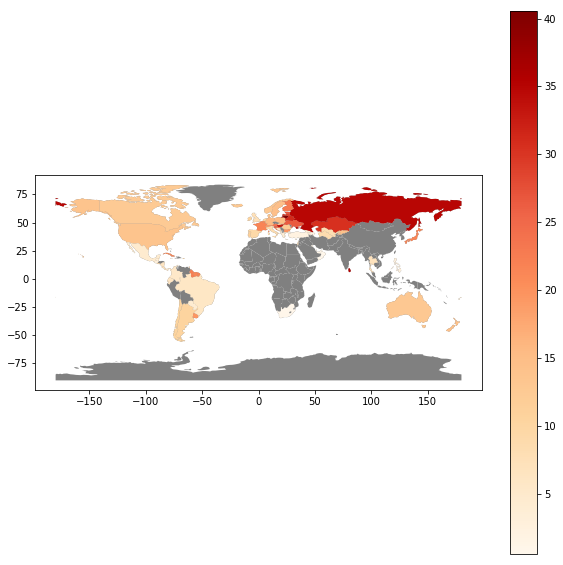

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = merged.plot(color="grey", figsize=(10,10))
merged.dropna().plot(ax=ax, column="suicide_per_100k", cmap='OrRd', legend=True)


Veliko držav v main datoteki manjka, zato niso prikazane na zemljevidu.

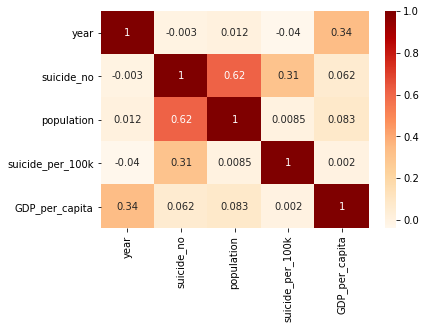

In [11]:
hmm = main
hmm = hmm.replace({'male': 0})
hmm = hmm.replace({'female': 1}) #sprememba iz male, female -> 0, 1
sns.heatmap(main.corr(),cmap='OrRd',annot=True)
plt.show()

Korelacije v zgornjem grafu so pričakovane: število samomorov najbolj sovpada z velikostjo populacije, raven samomorov pa s številom samomorov.

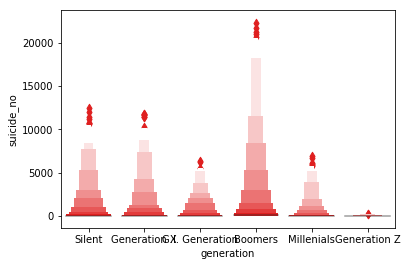

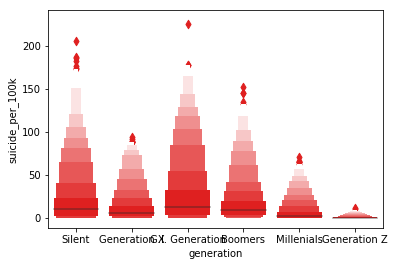

In [12]:
sns.boxenplot(x="generation", y="suicide_no", color="r", scale="linear", data=main)
plt.show()

sns.boxenplot(x="generation", y="suicide_per_100k", color="r", scale="linear", data=main)
plt.show()

Zgoraj vidimo, da je največ samomorov pri generaciji "Baby boomers", predvsem v sled večjemu številu otrok, kar pomeni tudi več ljudi. Pri drugem grafu pa gledamo raven samomorov, kjer je vodilna generacija "GI geenration". V to generacijo spadajo ljudje rojeni med letom 1900 in 1920, to pa so ravno tisti, ki so doživeli svetovni vojni.

In [13]:
#Mogoce bi lahko pogledali kako se za neko drzavo spreminja gini index in ga primerjali s suicide ratom.

-0.49926648804241863

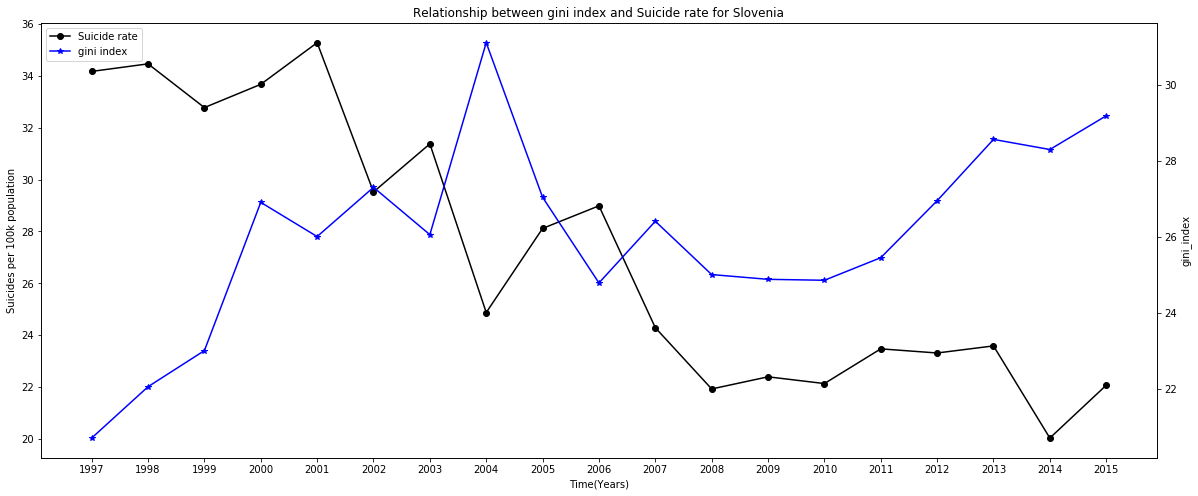

In [14]:
inequality
df = inequality[['country','year','gini_reported']]
df = df.loc[df['country'] == 'Slovenia'].reset_index(drop=True)
df2 = main[['year','suicide_per_100k']]
df2 = df2.loc[main['country'] == 'Slovenia'].reset_index(drop=True)
df = df.groupby('year').mean().reset_index()
df2 = df2.groupby('year').mean().reset_index()

df2 = df2[2:].reset_index(drop=True)
result = pd.concat([df2, df[['gini_reported']]], axis = 1, sort=True).dropna()

fig, ax = plt.subplots(figsize=(20, 8))
year_SR = ax.plot(result['year'],result['suicide_per_100k'],marker='o',color='BLACK', label='Suicide rate')

# line graph 2
ax2 = ax.twinx()
year_GDP = ax2.plot(result['year'],result['gini_reported'],marker='*',color='BLUE', label='gini index') 

# Joining legends.
lns = year_SR + year_GDP
labels = [l.get_label() for l in lns]
ax.legend(lns, labels, loc=2)

# Setting labels
ax.set_ylabel('Suicides per 100k population')
ax2.set_ylabel('gini_index')
ax.set_xlabel('Time(Years)')
ax.set(xticks=result['year'].unique());
plt.title('Relationship between gini index and Suicide rate for Slovenia');
result['suicide_per_100k'].corr(result['gini_reported']) #korelacija je -0.4992664880424186 kar pomeni da je ravno nasprotno kot smo pričakovali, se pravi korelacija je ampak očitno je pri majhnih razlikah prebivalstva stopnja samomorov višja


Iz do sedaj ugotovljenega smo naredili profil ljudi, ki so najbolj nagnjeni k samomoru: moški, starost nad 75 let, GI generacije.

-0.7487629253265545

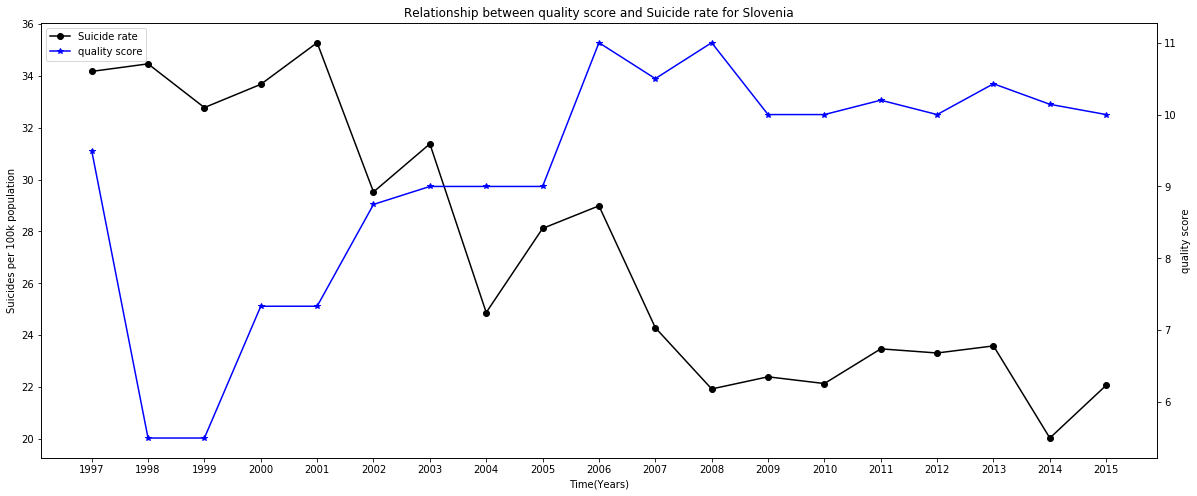

In [15]:

df = inequality_slovenia[['year','quality_score']]
#df = df.loc[df['country'] == 'Slovenia'].reset_index(drop=True)
df2 = main[['year','suicide_per_100k']]
df2 = df2.loc[main['country'] == 'Slovenia'].reset_index(drop=True)
df = df.groupby('year').mean().reset_index()
df2 = df2.groupby('year').mean().reset_index()

df2 = df2[2:].reset_index(drop=True)
result = pd.concat([df2, df[['quality_score']]], axis = 1, sort=True).dropna()

fig, ax = plt.subplots(figsize=(20, 8))
year_SR = ax.plot(result['year'],result['suicide_per_100k'],marker='o',color='BLACK', label='Suicide rate')

# line graph 2
ax2 = ax.twinx()
year_GDP = ax2.plot(result['year'],result['quality_score'],marker='*',color='BLUE', label='quality score') 

# Joining legends.
lns = year_SR + year_GDP
labels = [l.get_label() for l in lns]
ax.legend(lns, labels, loc=2)

# Setting labels
ax.set_ylabel('Suicides per 100k population')
ax2.set_ylabel('quality score')
ax.set_xlabel('Time(Years)')
ax.set(xticks=result['year'].unique());
plt.title('Relationship between quality score and Suicide rate for Slovenia');
result['suicide_per_100k'].corr(result['quality_score']) #korelacija je -0.7487629253265544 kar pomeni da je pri višji kvaliteti življenja samomorv manj
#To je razvidno tudi z grafa kjer se kvaliteta življenja zvišuje raven samomorov pa pada.

### Poizkus da bi nardil nek model:
Za učenje modela bi uporabil master podatke in sicer stolpce: sex, age, GDP_per_capita, generation, suicide_per_100k
Model bi s pomočjo klasifikacije uvrstil nove podatke ki mu jih damo v eno izmed kategorij rizika za samomor: visoka, srednja, nizka. Mogoce ce bi kr suicide_per_100k spremenil v visoka, srednja, nizka in potem na podlagi ostalih spremenljivk klasificirali v katero kategorijo pade določena oseba.

In [43]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

#vzamem une stolpce ki jih mislm uporabt in dropna() mam zato da dam vn vse vrstice kjer je kaki NaN
podatki = main[['country', 'sex', 'age', 'suicide_per_100k', 'GDP_per_capita']]
podatki = podatki.dropna()

#a = podatki[podatki['suicide_per_100k'] < 5.0]
#b = podatki[podatki['suicide_per_100k'] > 5.0]
#c = podatki[(podatki['suicide_per_100k'] > 5.0) & (podatki['suicide_per_100k'] < 20.0)]

#a['suicide_per_100k'] = 'low'
#b['suicide_per_100k'] = 'high'
#c['suicide_per_100k'] = 'medium'

#ab = pd.concat([a,b])
#abc = pd.concat([ab, c])
#podatki = ab

#tam kjer je samomorov manj kokr 5 dam da je to 0 in kjer je pa več pa dam 1
podatki.loc[podatki['suicide_per_100k'] < 2.12, 'suicide_per_100k'] = 0     #0.33 kvantil
podatki.loc[(podatki['suicide_per_100k'] > 2.12) & (podatki['suicide_per_100k'] < 12.0306), 'suicide_per_100k'] = 1
podatki.loc[podatki['suicide_per_100k'] > 12.0306, 'suicide_per_100k'] = 2  #0.67 kvantil

#print(podatki['suicide_per_100k'])

#tuki podobno kokr zgori samo da za GDP
podatki.loc[podatki['GDP_per_capita'] < 15000, 'GDP_per_capita'] = 0
podatki.loc[podatki['GDP_per_capita'] > 15000, 'GDP_per_capita'] = 1
#podatki.loc[(podatki['GDP_per_capita'] > 10000) & (podatki['GDP_per_capita'] < 20000), 'GDP_per_capita'] = 1


#razdelim celotne podatke na 70% vrstic na učne in 30% vrstiv na testne
podatki_train, podatki_test = train_test_split(podatki, test_size=0.3)

'''
all_data = pd.concat((podatki_train, podatki_test))
for column in all_data.select_dtypes(include=[np.object]).columns:
    podatki_train[column] = podatki_train[column].astype('category', categories = all_data[column].unique())
    podatki_test[column] = podatki_test[column].astype('category', categories = all_data[column].unique())
'''


#x so vsi stolpci razen tisti ki ga napovedujemo (se pravi suicide_per_100k), y pa je tisti ki ga napovedujemo
podatki_train_x = podatki_train.drop(columns='suicide_per_100k')
podatki_train_y = podatki_train['suicide_per_100k']

#kle isto samo da za testno mnozico
podatki_test_x = podatki_test.drop(columns='suicide_per_100k')
podatki_test_y = podatki_test['suicide_per_100k']

#vse kar ni cifra se s tem spodi spremeni v cifre in na način da nardi nove stolpce ki so country_slovenia, country_amerika, itd
#in potem v saki vrstici nardi po tem principu: ce gre za slovenijo bo napisal: country_slovenia = 1 in country_amerika = 0 in country_russia = 0, itd
podatki_train_x = pd.get_dummies(podatki_train_x)
podatki_train_y = pd.get_dummies(podatki_train_y)

podatki_test_x = pd.get_dummies(podatki_test_x)
podatki_test_y = pd.get_dummies(podatki_test_y)


lr = linear_model.LinearRegression()
model = lr.fit(podatki_train_x, podatki_train_y)
print('Accuracy of Linear regression on test set: {:.2f}'
     .format(model.score(podatki_test_x, podatki_test_y)))

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(podatki_train_x, podatki_train_y)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(podatki_test_x, podatki_test_y)))


Accuracy of Linear regression on test set: 0.46
Accuracy of Decision Tree classifier on test set: 0.85


In [ ]:
podatki = main[['sex', 'age', 'suicide_per_100k', 'GDP_per_capita']]
podatki = podatki.dropna()

#podatki.loc[podatki['suicide_per_100k'] > 90.0, 'suicide_per_100k'] = 'high'
#podatki.loc[podatki['suicide_per_100k'] < 25.0, 'suicide_per_100k'] = 'low'
a = podatki[podatki['suicide_per_100k'] < 25.0]
b = podatki[podatki['suicide_per_100k'] > 90.0]
c = podatki[(podatki['suicide_per_100k'] > 25.0) & (podatki['suicide_per_100k'] < 90.0)]
a['suicide_per_100k'] = 'low'
b['suicide_per_100k'] = 'high'
c['suicide_per_100k'] = 'medium'

ab = pd.concat([a,b])
abc = pd.concat([ab, c])
podatki = abc.sort_values(by='country')

podatki.loc[podatki['GDP_per_capita'] < 10000, 'GDP_per_capita'] = 0
podatki.loc[podatki['GDP_per_capita'] > 20000, 'GDP_per_capita'] = 2
podatki.loc[(podatki['GDP_per_capita'] > 10000) & (podatki['GDP_per_capita'] < 20000), 'GDP_per_capita'] = 1
podatki.sort_values(by='GDP_per_capita')


podatki_train, podatki_test = train_test_split(podatki, test_size=0.3)

podatki_train_x = podatki_train.drop(columns='suicide_per_100k')
podatki_train_y = podatki_train['suicide_per_100k']

podatki_test_x = podatki_test.drop(columns='suicide_per_100k')
podatki_test_y = podatki_test['suicide_per_100k']


podatki_train_x = pd.get_dummies(podatki_train_x)
podatki_train_y = pd.get_dummies(podatki_train_y)

podatki_test_x = pd.get_dummies(podatki_test_x)
podatki_test_y = pd.get_dummies(podatki_test_y)


lr = linear_model.LinearRegression()
model = lr.fit(podatki_train_x, podatki_train_y)

podatki_train_x


#train_data_x
#podatki['suicide_per_100k'].value_counts()

#train_x, test_x = train_test_split(gledani_x, test_size=0.25)
#train_x, test_x = train_test_split(gledani_x, test_size=0.25)